In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.decomposition import PCA

In [2]:
#load preprocessed data
df = pd.read_csv('../data/heart_disease.csv')
X = df.drop(columns=['num'])
df

,age,trestbps,chol,thalach,oldpeak,ca,num,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,-0.724272,0.0,True,False,False,False,True,False,True,False,False,True,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2.456228,2.0,True,False,False,True,False,False,True,True,True,False,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1.396061,1.0,True,False,False,True,False,False,True,True,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,-0.724272,0.0,True,False,True,False,False,False,False,False,False,True,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,-0.724272,0.0,False,True,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,-1.234430,0.334813,-0.770990,0.138373,-0.724272,1.0,True,False,False,False,False,False,False,False,True,False,False,True
299,1.502821,0.700612,-1.038723,-0.376896,2.036303,1.396061,2.0,True,False,False,True,True,False,False,False,True,False,False,True
300,0.283813,-0.096170,-2.238149,-1.515388,0.138373,0.335894,3.0,True,False,False,True,False,False,False,True,True,False,False,True
301,0.283813,-0.096170,-0.206864,1.068113,-0.896862,0.335894,1.0,False,True,False,False,False,False,True,False,True,False,False,False


# Apply initial PCA

In [3]:
pca = PCA()
X_pca = pca.fit_transform(X)
print(f"Old X shape: {X.shape}\nTransformed X shape: {X_pca.shape}")

Old X shape: (303, 18)
Transformed X shape: (303, 18)


## Explained Variance Ratio

In [4]:
# Explained variance ratio is the amount of variance each principal component explains
# variance ratio of each principal component = eigenvalue of component / total eigenvalues
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance_ratio = explained_variance_ratio.sum()

# Print results
print(f"\nExplained Variance Ratio:\n{explained_variance_ratio}")
print(f"\nTotal Explained Variance Ratio: {total_explained_variance_ratio:.4f}")



Explained Variance Ratio:
[0.27728027 0.1445544  0.11316161 0.09850368 0.09313771 0.06226644
 0.04064876 0.03048228 0.02944889 0.02583809 0.02303979 0.01755978
 0.01608384 0.01384048 0.00563315 0.00441508 0.00262121 0.00148455]

Total Explained Variance Ratio: 1.0000


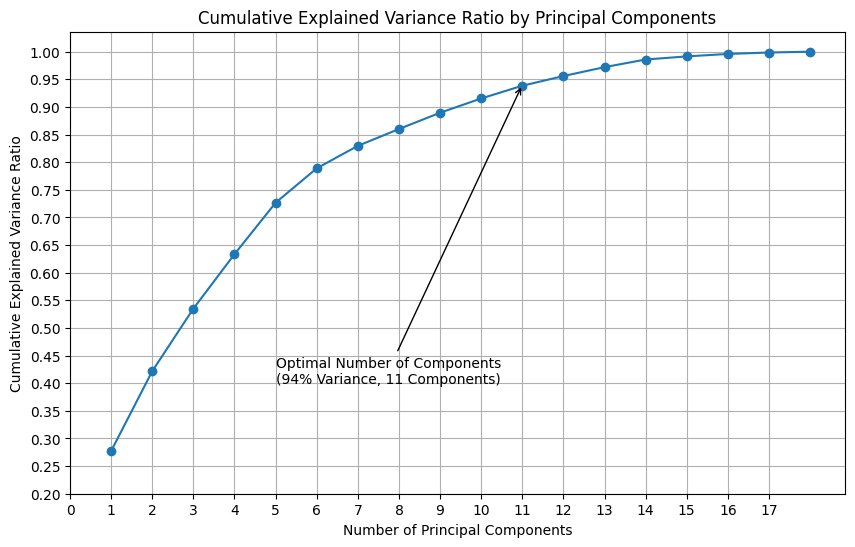

In [5]:
# Plot explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio)+1), cumulative_variance_ratio, marker='o')
plt.xticks(np.arange(len(cumulative_variance_ratio)))
plt.yticks(np.arange(0.2, 1.05, 0.05))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.annotate('Optimal Number of Components\n(94% Variance, 11 Components)',
            xy=(11, 0.94), 
            xytext=(5, 0.40),
            arrowprops=dict(arrowstyle='->')
)
plt.grid()
plt.show()

# Apply optimal PCA (11 components)

In [6]:
pca = PCA(n_components=11) # Optimal number of components based on previous analysis
X_pca = pca.fit_transform(X)
print(f"Old X shape: {X.shape}\nTransformed X shape: {X_pca.shape}")

Old X shape: (303, 18)
Transformed X shape: (303, 11)


## Plot Results

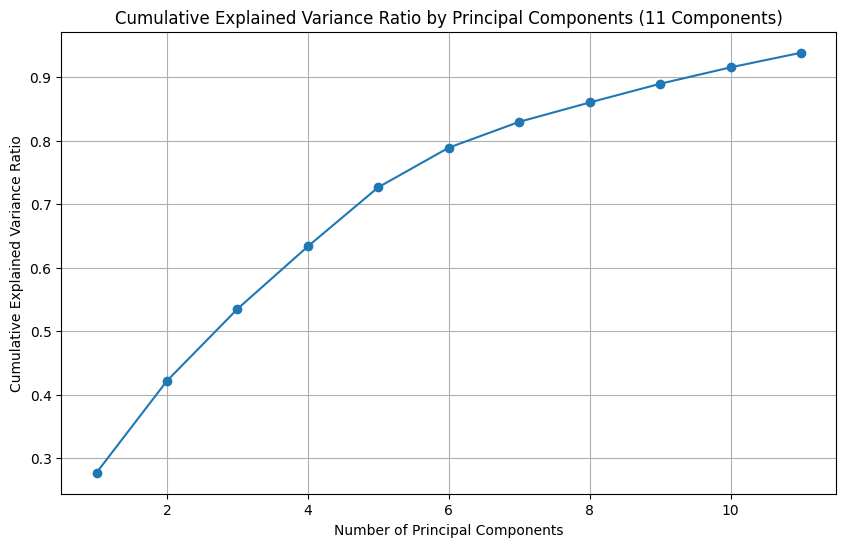

In [7]:
# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio)+1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components (11 Components)')
plt.grid()
plt.show()

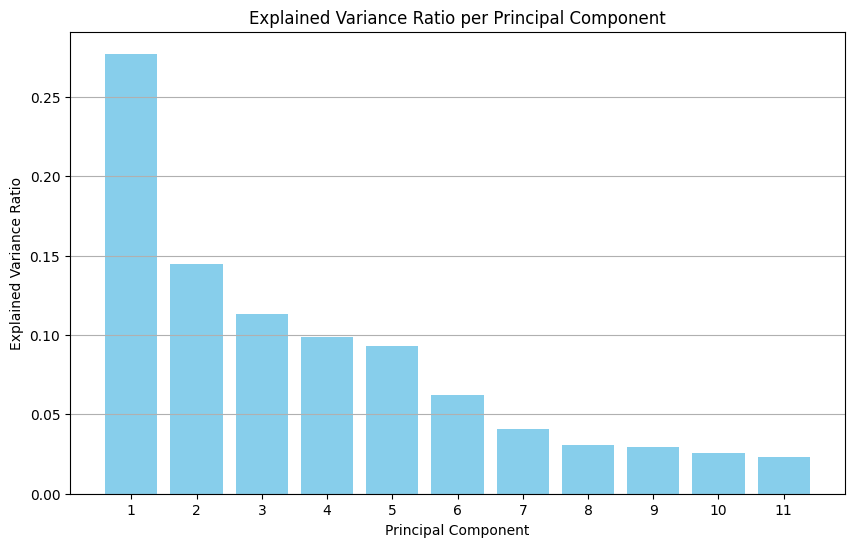

In [94]:
# Variance retained per principal component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio)+1), pca.explained_variance_ratio_, color='skyblue')
plt.xticks(range(1, len(explained_variance_ratio)+1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.grid(axis='y')
plt.show()

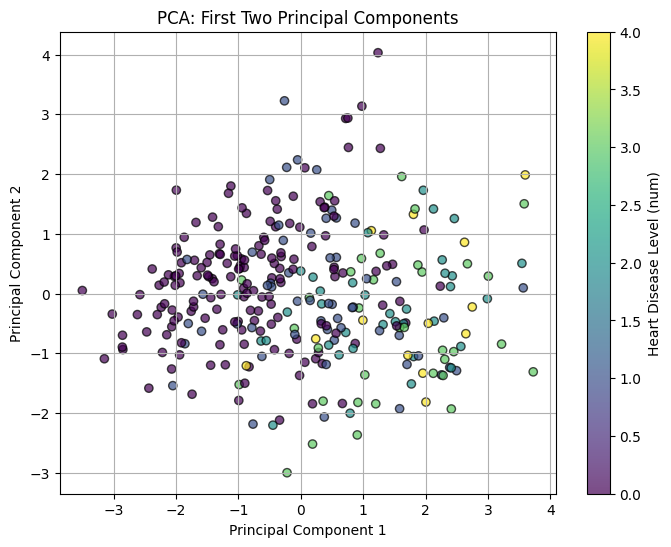

In [95]:
# Scatter plot of first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['num'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.colorbar(label='Heart Disease Level (num)')
plt.grid(True)
plt.show()

## Save results

In [97]:
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['num'] = df['num']
df_pca.to_csv('../data/heart_disease.csv', index=False)
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,num
0,0.675205,0.344930,1.289485,-0.087400,-0.438102,1.117363,-0.144715,-0.384428,0.385048,-1.030932,-0.052244,0.0
1,3.544619,0.506039,-0.222566,-0.653609,0.713136,-1.170823,0.391445,-0.428654,0.086070,-0.125677,0.053414,2.0
2,2.386927,-1.237065,-0.578411,-0.018786,0.465064,0.576870,-0.705147,-0.060905,0.407639,0.188710,0.092074,1.0
3,-1.344182,-0.262477,1.258423,2.743671,0.313740,1.221851,0.702343,0.226808,-0.184473,-0.386414,-0.377414,0.0
4,-1.755805,-0.296602,0.881092,0.764861,0.245258,0.185786,0.279775,-1.013160,-0.128125,-0.362403,0.480802,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.622619,-1.052430,-0.783222,0.766006,-1.006978,-0.233717,0.353068,0.744016,0.037562,0.076190,0.633262,1.0
299,2.566185,-0.885424,1.080689,-0.090710,1.081507,0.992006,-0.348138,0.386570,-0.328988,0.318557,0.261857,2.0
300,0.905604,-2.366826,0.785159,-1.188388,-0.033922,-0.595107,-0.390816,0.396056,-0.223410,0.394138,0.015781,3.0
301,-0.777244,0.692779,-0.291897,-0.656726,0.792481,0.273470,-0.046283,-0.874889,0.082147,0.511426,0.921933,1.0
